In [96]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#Problem 1

In [219]:
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(data=y, columns=['Species'])
df = pd.concat([X, y], axis=1)
# 0: 'setosa', 1:'versicolor', 2:'virginica'
df = df.loc[df['Species'] > 0, ['petal_length', 'sepal_length', 'Species']]
df.reset_index(drop=True, inplace=True)

<Figure size 720x720 with 0 Axes>

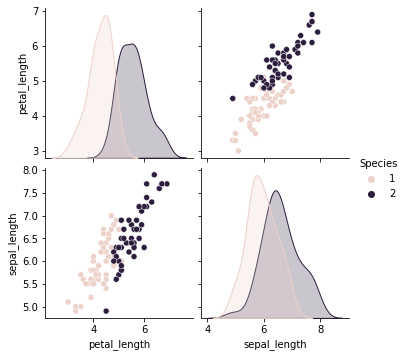

In [220]:
corr_df = df.corr()
plt.figure(figsize=(10,10))
sns.pairplot(data=df, hue="Species")
plt.show()

Visualization of the results is also effective in solving real problems.However, it is not desirable to limit the number of features used for training and estimation to two for this purpose. Therefore, learning and estimation are done in multiple dimensions, and feature extraction methods such as Principal Component Analysis are applied only for visualization. It is also possible to visualize the data using the scatter plot matrix used in Week 3.

#Problem 2

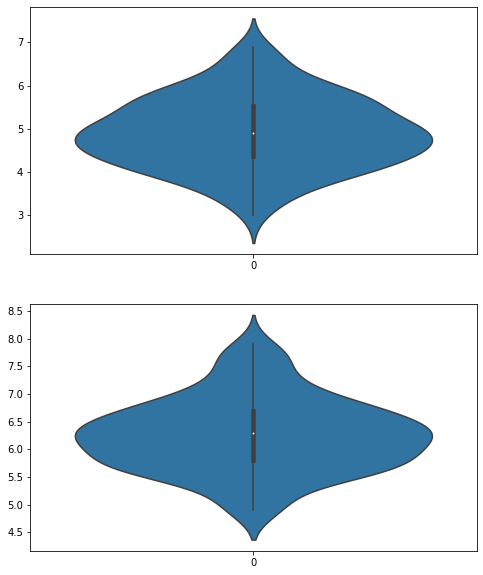

In [249]:
plot, axes = plt.subplots(2,1, figsize=(8,10))
sns.violinplot(data=df['petal_length'], ax=axes[0])
sns.violinplot(data=df['sepal_length'], ax=axes[1])

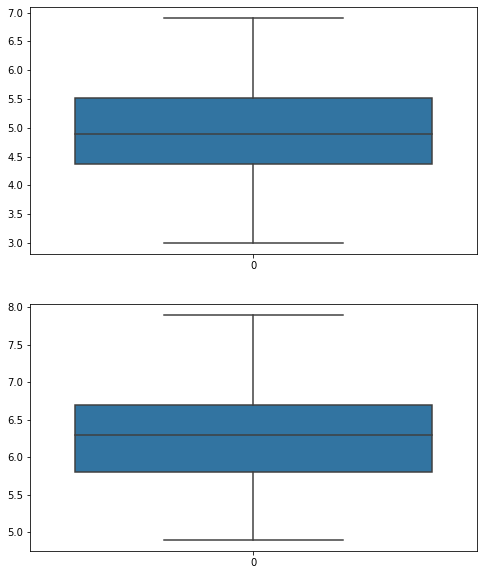

In [250]:
plot, axes = plt.subplots(2,1, figsize=(8,10))
sns.boxplot(data=df['petal_length'], ax=axes[0])
sns.boxplot(data=df['sepal_length'], ax=axes[1])

#Problem 3

In [224]:
X = df[['petal_length', 'sepal_length']]
y = df['Species']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

We used Pandas DataFrame to analyze the data. However, scikit-learn is designed to work with NumPy ndarray. Therefore, let's convert to ndarray at this stage. The feature (explanatory variable) is stored in X and the correct answer (objective variable) is stored in an ndarray called y.



The goal of a classification problem is to correctly classify unknown data. In order to check whether this goal is achieved, we leave some of the data for which we actually know the answer, but not for training. The data not used for training is used for estimation, and the index values obtained from the estimation are used for verification. The data used for training is the training data, and the data used for verification is the verification data, and the ratio is generally 7:3 to 8:2.

#[Problem 4] Pretreatment/Standardization
We perform processing to improve classification accuracy. The appropriate method differs depending on the method, but here we will use standardization as an example.


A library for standardization is also available in scikit-learn. Please use this to standardize.



In [227]:
from sklearn.preprocessing import StandardScaler

In [228]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.mean_

array([4.94666667, 6.27466667])

In [229]:
X_train = scaler.transform(X_train)
X_train

array([[-0.68500029, -1.20567966],
       [-0.18378057, -0.11621009],
       [-1.18622002, -0.73876413],
       [-1.81274468, -0.89440264],
       [ 0.44274409,  0.19506693],
       [-0.55969536, -1.36131816],
       [ 0.19213423, -0.73876413],
       [ 0.81865889,  0.03942842],
       [-0.3090855 ,  0.03942842],
       [-0.81030522, -0.11621009],
       [ 1.31987861,  0.03942842],
       [ 0.31743916,  0.35070544],
       [-2.06335454, -2.13951071],
       [-0.3090855 , -0.2718486 ],
       [ 2.447623  ,  2.21836756],
       [ 0.44274409,  0.19506693],
       [ 0.69335395,  0.81762097],
       [ 1.44518354,  1.44017501],
       [-0.93561016, -1.05004115],
       [-0.68500029,  0.03942842],
       [-1.81274468, -1.9838722 ],
       [-0.68500029,  0.66198246],
       [-0.55969536, -2.13951071],
       [-0.55969536,  0.19506693],
       [ 1.06926875,  0.66198246],
       [-0.05847563, -1.05004115],
       [-0.05847563,  0.97325948],
       [-0.18378057,  0.81762097],
       [-1.06091509,

In [230]:
X_test = scaler.transform(X_test)
X_test

array([[-0.18378057, -0.58312562],
       [-0.05847563,  0.03942842],
       [ 0.69335395,  0.19506693],
       [-2.43926934, -1.82823369],
       [-0.43439043, -0.2718486 ],
       [ 1.44518354,  2.21836756],
       [-0.05847563, -0.2718486 ],
       [ 0.81865889,  0.66198246],
       [-0.55969536, -0.89440264],
       [ 1.06926875,  1.44017501],
       [-1.18622002, -1.20567966],
       [-0.43439043,  0.50634395],
       [-0.3090855 ,  0.66198246],
       [ 0.0668293 ,  0.66198246],
       [ 0.19213423,  0.97325948],
       [ 0.81865889,  0.19506693],
       [-0.3090855 , -0.2718486 ],
       [-2.06335454, -1.9838722 ],
       [ 0.19213423, -0.73876413],
       [-1.18622002, -1.20567966],
       [ 2.19701313,  2.21836756],
       [ 0.94396382,  0.66198246],
       [-1.56213481, -1.20567966],
       [-1.06091509, -0.89440264],
       [-1.68743975, -1.05004115]])

#[Problem 5] Learning and estimation

In [231]:
from sklearn.neighbors import KNeighborsClassifier
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [232]:
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [233]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train, y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

#Problem 6

In [234]:
y_pred3 = neigh3.predict(X_test)
y_pred5 = neigh5.predict(X_test)
y_pred1 = neigh1.predict(X_test)
print(y_test.ravel())

[1 2 2 1 1 2 2 2 1 2 1 1 1 1 2 2 1 1 2 1 2 2 1 1 1]


In [309]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
def evaluate(prediction, expectation, name="", ave='binary'):
  """
  prediction: 1D array of prediction
  expectation: actual output
  """
  print("{} have accuracy score of {}".format(name, accuracy_score(expectation, prediction)))
  print("{} have precision score of {}".format(name, precision_score(expectation, prediction, average=ave)))
  print("{} have f1 score of {}".format(name, f1_score(expectation, prediction, average=ave)))
  print("{} have recall score of {}".format(name, recall_score(expectation, prediction, average=ave)))
  print("confusion matrix: \n{}\n\n".format(confusion_matrix(expectation, prediction)))

In [240]:
evaluate(y_pred3, y_test.ravel(), name='3-nn')
evaluate(y_pred5, y_test.ravel(), name='5-nn')
evaluate(y_pred1, y_test.ravel(), name='1-nn')

3-nn have accuracy score of 0.88
3-nn have precision score of 1.0
3-nn have f1 score of 0.88
3-nn have recall score of 0.7857142857142857
confusion matrix: 
[[11  3]
 [ 0 11]]


5-nn have accuracy score of 0.88
5-nn have precision score of 0.9230769230769231
5-nn have f1 score of 0.888888888888889
5-nn have recall score of 0.8571428571428571
confusion matrix: 
[[12  2]
 [ 1 10]]


1-nn have accuracy score of 0.84
1-nn have precision score of 0.8571428571428571
1-nn have f1 score of 0.8571428571428571
1-nn have recall score of 0.8571428571428571
confusion matrix: 
[[12  2]
 [ 2  9]]




#[Problem 7] Visualization

In [241]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


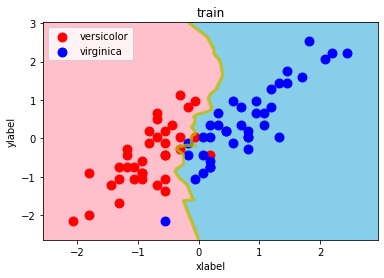

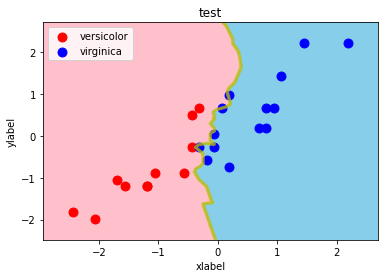

In [258]:
decision_region(X_train, y_train, neigh3, title="train")
decision_region(X_test, y_pred3, neigh3, title='test')

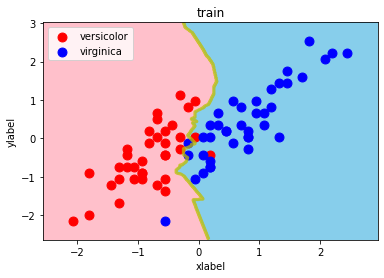

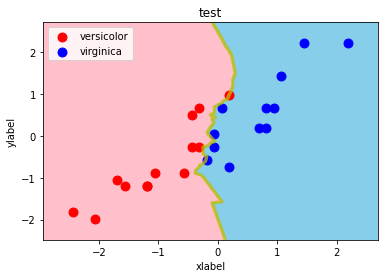

In [259]:
decision_region(X_train, y_train, neigh5, title='train')
decision_region(X_test, y_pred5, neigh5,title='test')

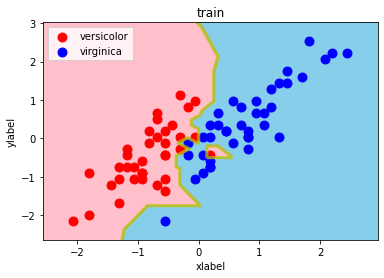

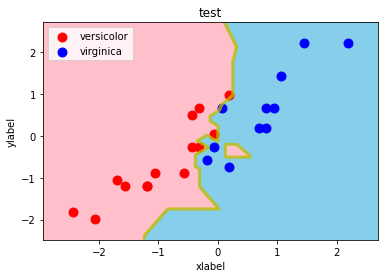

In [260]:
decision_region(X_train, y_train, neigh1, title='train')
decision_region(X_test, y_pred1, neigh1, title='test')

#Problem 8

In [267]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
def learn_model(X_train, X_test, y_train, y_test, model, model_name="default"):
  model.fit(X_train, y_train)
  # predition
  y_pred = model.predict(X_test)
  #evaluate
  evaluate(y_pred,y_test, model_name)

  decision_region(X_train, y_train,model, title='train set')
  decision_region(X_test, y_pred,model, title='prediction')

Logistic Regression have accuracy score of 0.92
Logistic Regression have precision score of 1.0
Logistic Regression have f1 score of 0.923076923076923
Logistic Regression have recall score of 0.8571428571428571
confusion matrix: 
[[12  2]
 [ 0 11]]




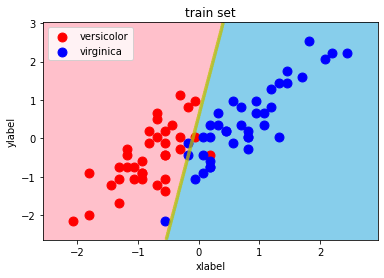

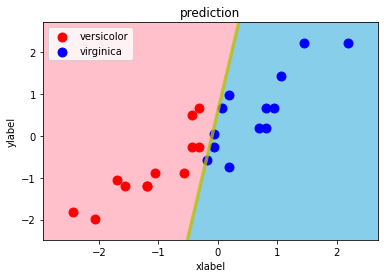

In [268]:
clf = LogisticRegression(random_state=0)
learn_model(X_train, X_test, y_train, y_test, clf, 'Logistic Regression')

SVC have accuracy score of 0.92
SVC have precision score of 1.0
SVC have f1 score of 0.923076923076923
SVC have recall score of 0.8571428571428571
confusion matrix: 
[[12  2]
 [ 0 11]]




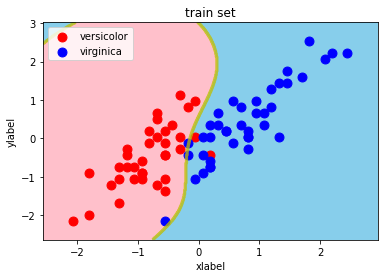

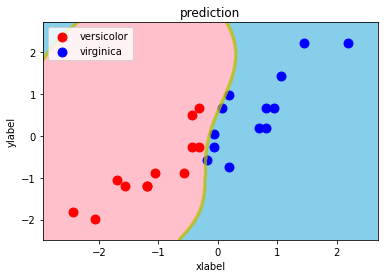

In [269]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
learn_model(X_train, X_test, y_train, y_test, clf, 'SVC')

Decision Tree have accuracy score of 0.88
Decision Tree have precision score of 0.9230769230769231
Decision Tree have f1 score of 0.888888888888889
Decision Tree have recall score of 0.8571428571428571
confusion matrix: 
[[12  2]
 [ 1 10]]




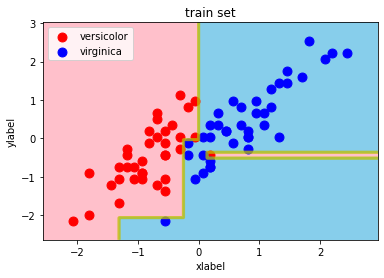

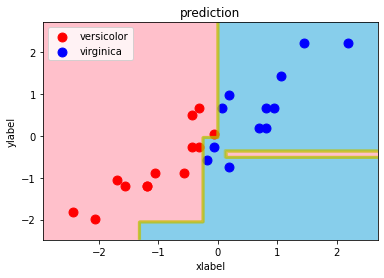

In [270]:
clf = DecisionTreeClassifier(random_state=0)
learn_model(X_train, X_test, y_train, y_test, clf, 'Decision Tree')

Decision Tree have accuracy score of 0.92
Decision Tree have precision score of 1.0
Decision Tree have f1 score of 0.923076923076923
Decision Tree have recall score of 0.8571428571428571
confusion matrix: 
[[12  2]
 [ 0 11]]




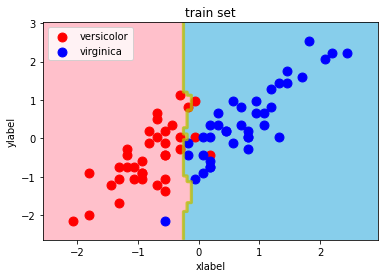

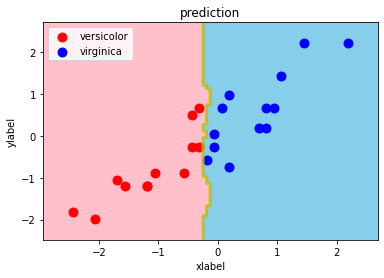

In [271]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
learn_model(X_train, X_test, y_train, y_test, clf, 'Decision Tree')

#Problem 9

In [285]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X.to_numpy(), y.to_numpy(),test_size=0.25)

Logistic Regression have accuracy score of 0.76
Logistic Regression have precision score of 0.9333333333333333
Logistic Regression have f1 score of 0.8235294117647058
Logistic Regression have recall score of 0.7368421052631579
confusion matrix: 
[[14  5]
 [ 1  5]]




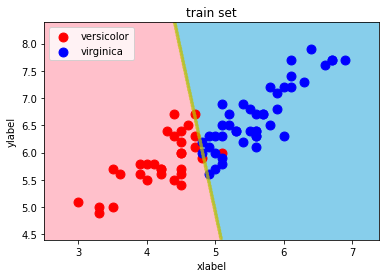

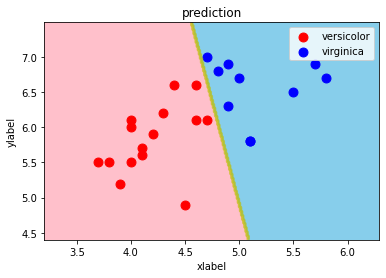

In [286]:
clf = LogisticRegression(random_state=0)
learn_model(X_train2, X_test2, y_train2, y_test2, clf, 'Logistic Regression')

SVC have accuracy score of 0.8
SVC have precision score of 0.9375
SVC have f1 score of 0.8571428571428572
SVC have recall score of 0.7894736842105263
confusion matrix: 
[[15  4]
 [ 1  5]]




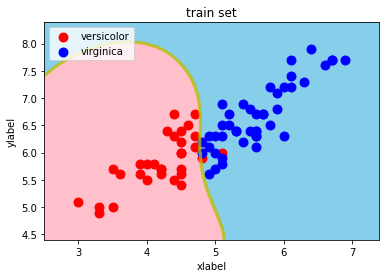

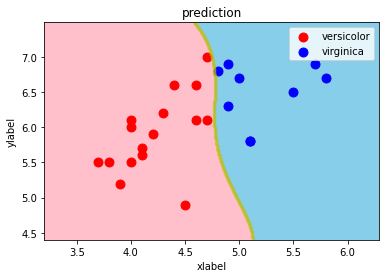

In [287]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
learn_model(X_train2, X_test2, y_train2, y_test2, clf, 'SVC')

Decision Tree have accuracy score of 0.8
Decision Tree have precision score of 0.9375
Decision Tree have f1 score of 0.8571428571428572
Decision Tree have recall score of 0.7894736842105263
confusion matrix: 
[[15  4]
 [ 1  5]]




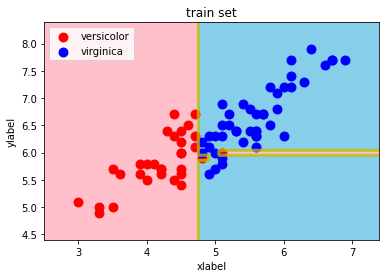

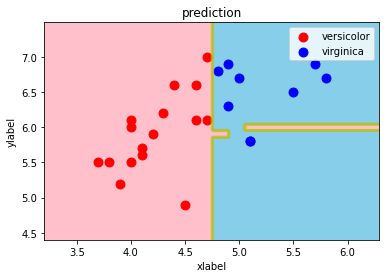

In [288]:
clf = DecisionTreeClassifier(random_state=0)
learn_model(X_train2, X_test2, y_train2, y_test2, clf, 'Decision Tree')

Decision Tree have accuracy score of 0.8
Decision Tree have precision score of 0.9375
Decision Tree have f1 score of 0.8571428571428572
Decision Tree have recall score of 0.7894736842105263
confusion matrix: 
[[15  4]
 [ 1  5]]




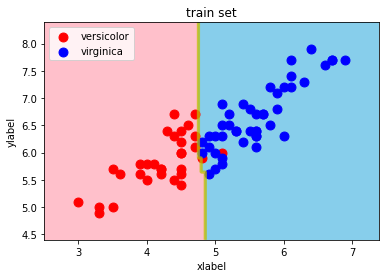

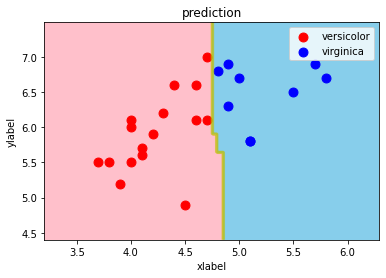

In [289]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
learn_model(X_train2, X_test2, y_train2, y_test2, clf, 'Decision Tree')

**What results would be obtained if you did not use standardization as a preprocessing step? Make a table of the index values and a diagram of the decision domain for each method, and compare and discuss the results.**

For every method, when we train the model without standardizing, the performance scores significantly reduce.

---


**In your discussion, please include what standardization means as a preprocessing step in machine learning.**

Standarization is an importing pre-processing step for machine learning. This is because for any model, different variables reign over different range (example: weight will range from 1-200kg but distance can be from 1m-10km). Therefore, in our example, to avoid the distance from overwhelming the weight, we need to standardize all variable to a normal scale.

#[Problem 10] (Advance task) Highly accurate method using all objective variables
Up to this point, we have reduced the types of irises and performed binary classification, but we will perform multi-value classification using all three types. Learn, estimate, and evaluate to find the most accurate method.

In [313]:
def decision_region_multi(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['setosa', 'versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [300]:
X, y = load_iris(return_X_y=True)
X = X[:,[0,2]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.75)

In [301]:
scaler = StandardScaler()
scaler.fit(X_train3)
print("mean: {}".format(scaler.mean_))

X_train3 = scaler.transform(X_train3)
X_test3 = scaler.transform(X_test3)

mean: [5.88125    3.84732143]


In [314]:
def learn_model_multi(X_train, X_test, y_train, y_test, model, model_name="default"):
  model.fit(X_train, y_train)
  # predition
  y_pred = model.predict(X_test)
  #evaluate
  evaluate(y_pred,y_test, model_name, ave='micro')

  decision_region_multi(X_train, y_train,model, title='train set')
  decision_region_multi(X_test, y_pred,model, title='prediction')

Logistic Regression have accuracy score of 0.8421052631578947
Logistic Regression have precision score of 0.8421052631578947
Logistic Regression have f1 score of 0.8421052631578947
Logistic Regression have recall score of 0.8421052631578947
confusion matrix: 
[[14  0  0]
 [ 1 10  3]
 [ 0  2  8]]




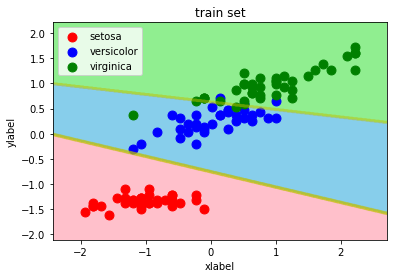

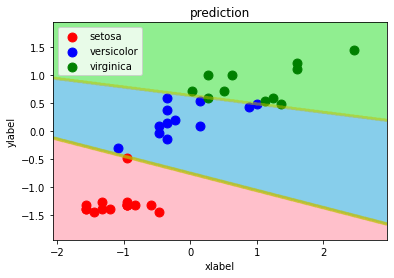

In [315]:
clf = LogisticRegression(random_state=0)
learn_model_multi(X_train3, X_test3, y_train3, y_test3, clf, 'Logistic Regression')

SVC have accuracy score of 0.8421052631578947
SVC have precision score of 0.8421052631578947
SVC have f1 score of 0.8421052631578947
SVC have recall score of 0.8421052631578947
confusion matrix: 
[[14  0  0]
 [ 0 11  3]
 [ 0  3  7]]




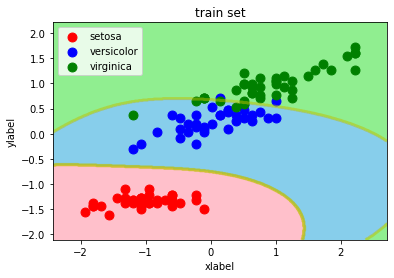

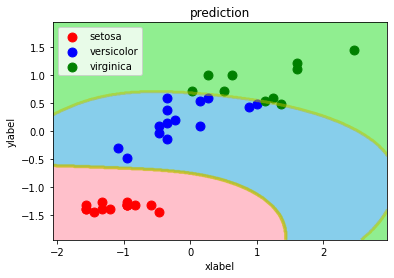

In [319]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
learn_model_multi(X_train3, X_test3, y_train3, y_test3, clf, 'SVC')

Decision Tree have accuracy score of 0.868421052631579
Decision Tree have precision score of 0.868421052631579
Decision Tree have f1 score of 0.868421052631579
Decision Tree have recall score of 0.868421052631579
confusion matrix: 
[[14  0  0]
 [ 0 14  0]
 [ 0  5  5]]




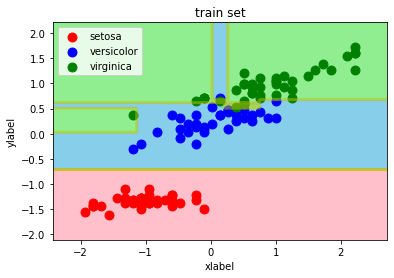

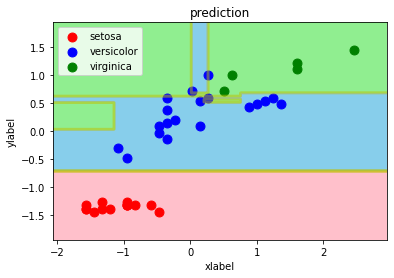

In [318]:
clf = DecisionTreeClassifier(random_state=0)
learn_model_multi(X_train3, X_test3, y_train3, y_test3, clf, 'Decision Tree')

Decision Tree have accuracy score of 0.8
Decision Tree have precision score of 0.8
Decision Tree have f1 score of 0.8000000000000002
Decision Tree have recall score of 0.8
confusion matrix: 
[[15  4]
 [ 1  5]]




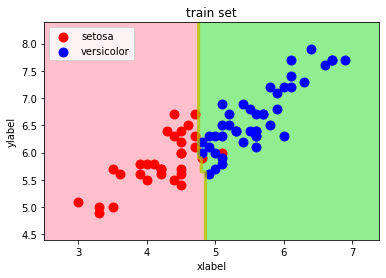

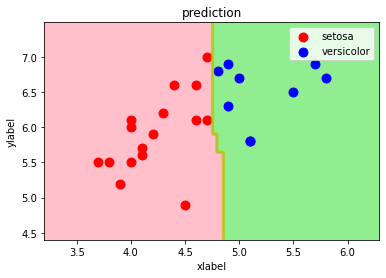

In [320]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
learn_model_multi(X_train2, X_test2, y_train2, y_test2, clf, 'Decision Tree')